In [1]:
import cv2
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import skimage.morphology   

In [2]:
img_in = cv2.imread("digitalizacao.jpeg",0)
img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)

In [3]:
def preprocessing_sobel_e_canny(img_in):
    
    canny_output = cv2.Canny(img_in, 90, 180, L2gradient = True )
    
    kernel = skimage.morphology.disk( 1)
    
    dilatada_canny = cv2.dilate(canny_output, kernel, iterations = 1 )
    
    sobel_x = cv2.convertScaleAbs(cv2.Sobel(img_in, cv2.CV_16S, 1, 0, ksize=3))
    sobel_y = cv2.convertScaleAbs(cv2.Sobel(img_in, cv2.CV_16S, 0, 1, ksize=3))
    sobel_output = sobel_x + sobel_y
    
    return ~dilatada_canny, ~sobel_output

In [4]:
thresh, t = preprocessing_sobel_e_canny(img_in)


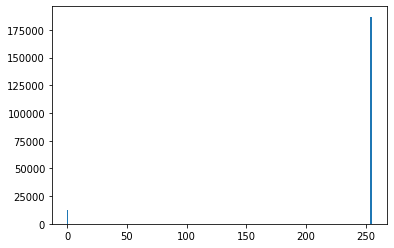

In [5]:

plt.hist(thresh.ravel(),256,[0,255])            #Também é possível observar a imagem dessa forma
plt.show()

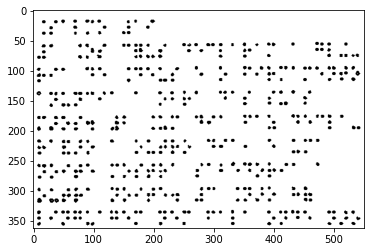

In [6]:
plt.imshow(thresh,cmap="gray")

<IPython.core.display.Javascript object>


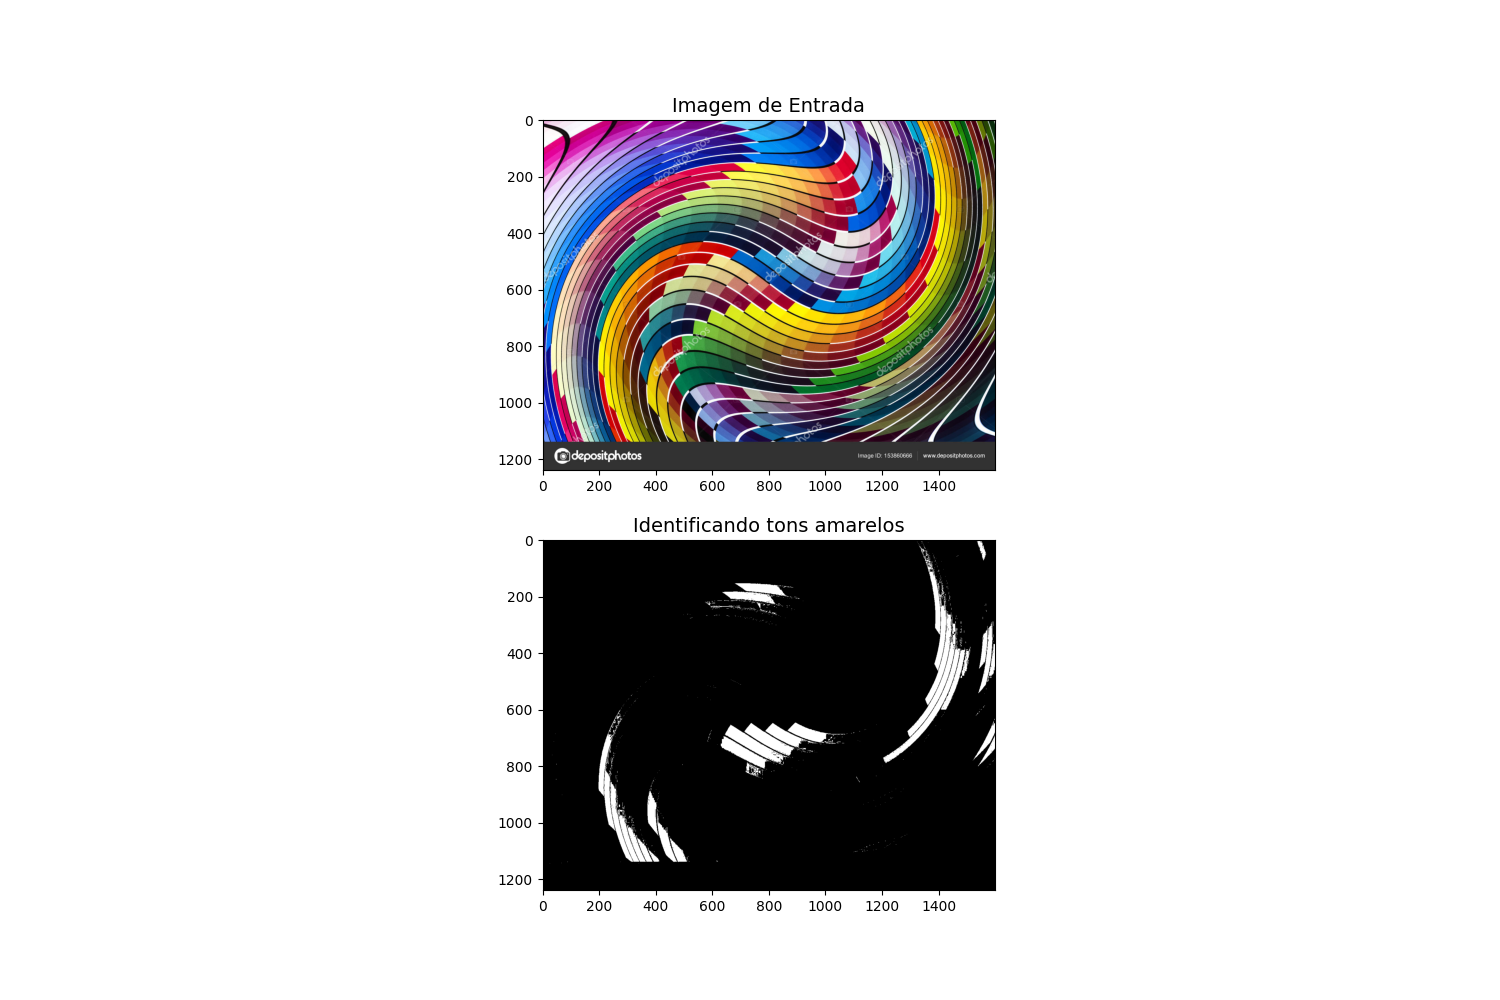

In [7]:
%matplotlib notebook
img = cv2.imread("colorido.jpg")

color_rgb =np.uint8([[[237,221,20]]])

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_range = np.array([25,150,50])
upper_range = np.array([35,255,255])

mask = cv2.inRange(hsv ,lower_range,  upper_range)

fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize= (15,10))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axs[0].set_title("Imagem de Entrada",size = 14)
axs[0].imshow(img)
axs[1].set_title("Identificando tons amarelos",size = 14)
axs[1].imshow(mask,cmap = "gray")



In [8]:
 #Pelo cursor do mouse informando a escala RGB que deverá ser identificada na imagem (azul)
color_bgr=np.uint8([[[4,83,210]]])
color_hsv = cv2.cvtColor(color_bgr,cv2.COLOR_RGB2HSV)                                                    
print(color_hsv)


[[[109 250 210]]]


<IPython.core.display.Javascript object>


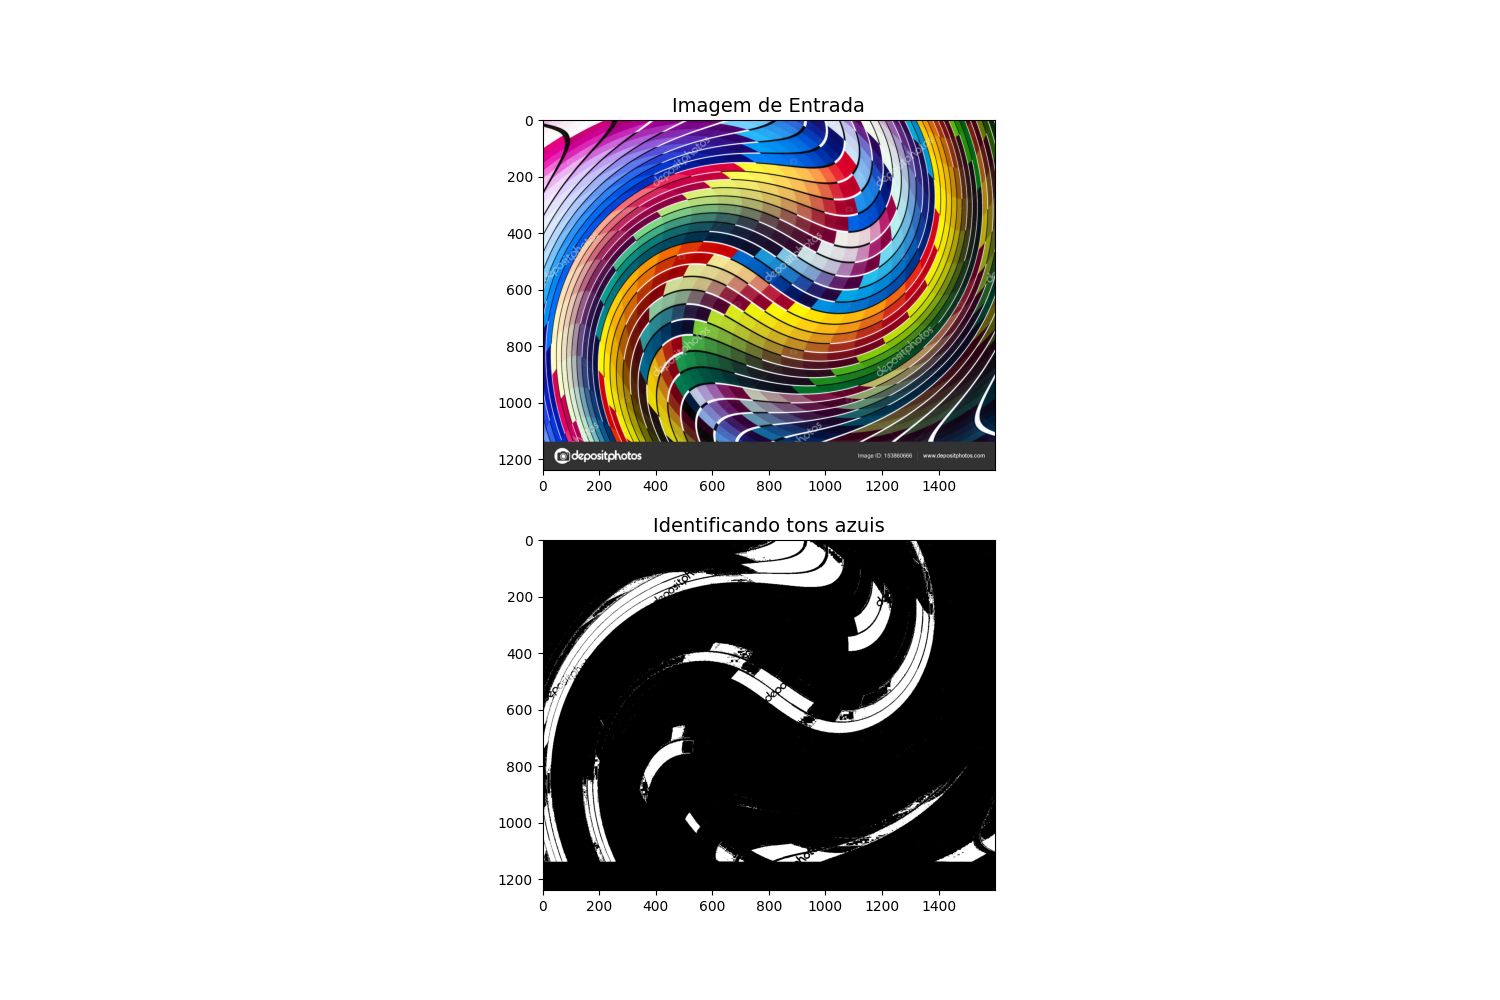

In [9]:
lower_range = np.array([99,150,50]) #Menor valor de escala
upper_range = np.array([119,255,255]) #maior valor de escala 

mask = cv2.inRange(hsv ,lower_range,  upper_range)

fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize= (15,10))


axs[0].set_title("Imagem de Entrada",size = 14)
axs[0].imshow(img)
axs[1].set_title("Identificando tons azuis",size = 14)
axs[1].imshow(mask,cmap = "gray")



## É possível também segregar cores por valores já definidos.
#### Exemplo de cores já definidas: 
* HSV Range for various colours:

* lower_black = [0,0,0]
* upper_black = [250,255,30]

* lower_white = [0,0,255]
* upper_white = [0,0,255]

* lower_red = [0,150,50]
* upper_red = [10,255,255]

* lower_green = [45,150,50]
* upper_green = [65,255,255]

* lower_yellow = [25,150,50]
* upper_yellow = [35,255,255]

* lower_light_blue = [95,150,0]
* upper_light_blue = [110,255,255]

* lower_orange = [15,150,0]
* upper_orange = [25,255,255]

* lower_dark_pink = [160,150,0]
* upper_dark_pink = [170,255,255]

* lower_pink = [145,150,0]
* upper_pink = [155,255,255]

* lower_cyan = [85,150,0]
* upper_cyan = [95,255,255]

* lower_dark_blue = [115,150,0]
* upper_dark_blue = [125,255,255]

In [10]:
from PIL import Image, ImageDraw

im = Image.open ('neymar.jpg')
isize = im.size
walnut = Image.open ('bola.JPG')
wsize = walnut.size
x0, y0 = wsize [0] // 2, wsize [1] // 2
pixel = walnut.getpixel ( (x0, y0) ) [:-1]

def diff (a, b):
    return sum ( (a - b) ** 2 for a, b in zip (a, b) )

best = (100000, 0, 0)
for x in range (isize [0] ):
    for y in range (isize [1] ):
        ipixel = im.getpixel ( (x, y) )
        d = diff (ipixel, pixel)
        if d < best [0]: best = (d, x, y)

draw = ImageDraw.Draw (im)
x, y = best [1:]
draw.rectangle ( (x - x0, y - y0, x + x0, y + y0), outline = 'red')
im.save ('out.png')

In [11]:
import cv2
import numpy as np

# Resizes a image and maintains aspect ratio
def maintain_aspect_ratio_resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # Grab the image size and initialize dimensions
    dim = None
    (h, w) = image.shape[:2]

    # Return original image if no need to resize
    if width is None and height is None:
        return image

    # We are resizing height if width is none
    if width is None:
        # Calculate the ratio of the height and construct the dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # We are resizing width if height is none
    else:
        # Calculate the ratio of the 0idth and construct the dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # Return the resized image
    return cv2.resize(image, dim, interpolation=inter)

# Load template and convert to grayscale
template = cv2.imread('bola.JPG')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
(tH, tW) = template.shape[:2]
cv2.imshow("template", template)

# Load original image, convert to grayscale
original_image = cv2.imread('neymar.jpg')
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
found = None

# Dynamically rescale image for better template matching
for scale in np.linspace(0.1, 3.0, 20)[::-1]:

    # Resize image to scale and keep track of ratio
    resized = maintain_aspect_ratio_resize(gray, width=int(gray.shape[1] * scale))
    r = gray.shape[1] / float(resized.shape[1])

    # Stop if template image size is larger than resized image
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break

    # Threshold resized image and apply template matching
    thresh = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    detected = cv2.matchTemplate(thresh, template, cv2.TM_CCOEFF)
    (_, max_val, _, max_loc) = cv2.minMaxLoc(detected)

    # Uncomment this section for visualization
    '''
    clone = np.dstack([thresh, thresh, thresh])
    cv2.rectangle(clone, (max_loc[0], max_loc[1]), (max_loc[0] + tW, max_loc[1] + tH), (0,255,0), 2)
    cv2.imshow('visualize', clone)
    cv2.waitKey(50)
    '''

    # Keep track of correlation value
    # Higher correlation means better match
    if found is None or max_val > found[0]:
        found = (max_val, max_loc, r)

# Compute coordinates of bounding box
(_, max_loc, r) = found
(start_x, start_y) = (int(max_loc[0] * r), int(max_loc[1] * r))
(end_x, end_y) = (int((max_loc[0] + tW) * r), int((max_loc[1] + tH) * r))

# Draw bounding box on ROI
cv2.rectangle(original_image, (start_x, start_y), (end_x, end_y), (0,255,0), 5)
cv2.imshow('detected', original_image)
cv2.imwrite('detected.png', original_image)
cv2.waitKey(0)

-1